In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [164]:
train_data=pd.read_csv("trainm.csv")
train_data
pd.set_option('display.max_columns', None)


In [165]:
train_data.head()

id  type                    locality  \
0  ff8081815733a243015733b2876600a6  BHK2  Cauvery Colony,Koramangala   
1  ff8081815ee25e15015ee50004da2acd  BHK2                   Bellandur   
2  ff80818163f29c9e0163f46770b873e7  BHK3               Thiruvanmiyur   
3  ff80818164b68a700164b74b1b247a1d  BHK1                   Attiguppe   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3                   Kodihalli   

    activation_date   latitude  longitude lease_type  gym  lift  \
0  21-04-2018 14:44  12.934471  77.634471     FAMILY    1     1   
1  09-10-2017 12:48  12.929557  77.672280     ANYONE    0     1   
2  12-06-2018 22:02  12.982870  80.262012     FAMILY    0     1   
3  20-07-2018 16:22  12.955991  77.531634     FAMILY    0     0   
4  31-05-2018 17:41  12.963903  77.649446     FAMILY    0     0   

   swimming_pool  negotiable      furnishing      parking  property_size  \
0              1           0  SEMI_FURNISHED         BOTH           1250   
1              0           1  SEMI_FURNISHED         BOTH           1400   
2              0           0  SEMI_FURNISHED         BOTH           1350   
3              0           1  SEMI_FURNISHED  TWO_WHEELER            600   
4              0           1  SEMI_FURNISHED         BOTH           1500   

   property_age  bathroom facing  cup_board  floor  total_floor  \
0            25         2      E          2      6           12   
1             4         2     NE          2      3            4   
2             6         3      E          3      1            5   
3             3         1      E          1      1            2   
4            15         3      E          4      0            0   

                                           amenities water_supply  \
0  {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...    CORP_BORE   
1  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...  CORPORATION   
2  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...    CORP_BORE   
3  {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
4  {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   

  building_type  balconies   rent  
0            AP          2  40000  
1            AP          2  22000  
2            AP          3  28000  
3            IH          0   8000  
4            IH          1  45000

In [166]:
train_data.shape

(20500, 25)

In [167]:
sum(train_data.isna().sum())

0

In [168]:
train_data['rent'].describe()

count    20500.000000
mean     19053.602195
std       8433.949300
min       8000.000000
25%      12500.000000
50%      17500.000000
75%      24000.000000
max      50000.000000
Name: rent, dtype: float64

In [169]:
numeric_cols=train_data.select_dtypes(include=[np.number])
corr=numeric_cols.corr()

In [170]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20500 non-null  object 
 2   locality         20500 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  int64  
 15  bathroom         20500 non-null  int64  
 16  facing           20500 non-null  object 
 17  cup_board   

In [171]:
print ('Top ten Correlated Features with Rent:'), print (corr['rent'].sort_values(ascending = False)[:10], '\n')
print ('Top ten Uncorrelated Features with Rent:'), print (corr['rent'].sort_values(ascending = False)[-10:])

Top ten Correlated Features with Rent:
rent             1.000000
bathroom         0.677516
property_size    0.588425
balconies        0.472405
lift             0.462606
total_floor      0.437437
swimming_pool    0.434776
gym              0.432081
floor            0.306769
longitude        0.163864
Name: rent, dtype: float64 

Top ten Uncorrelated Features with Rent:
lift             0.462606
total_floor      0.437437
swimming_pool    0.434776
gym              0.432081
floor            0.306769
longitude        0.163864
negotiable       0.062430
latitude         0.033130
cup_board       -0.001247
property_age    -0.010786
Name: rent, dtype: float64


(None, None)

In [172]:
train_data2=train_data.drop(['id',],axis=1)

In [173]:
train_data2

type                    locality   activation_date   latitude  \
0      BHK2  Cauvery Colony,Koramangala  21-04-2018 14:44  12.934471   
1      BHK2                   Bellandur  09-10-2017 12:48  12.929557   
2      BHK3               Thiruvanmiyur  12-06-2018 22:02  12.982870   
3      BHK1                   Attiguppe  20-07-2018 16:22  12.955991   
4      BHK3                   Kodihalli  31-05-2018 17:41  12.963903   
...     ...                         ...               ...        ...   
20495  BHK3          Gattigere,RR Nagar  13-12-2017 18:08  12.925380   
20496  BHK2       Koramangala 4th Block  19-10-2017 20:31  12.931072   
20497  BHK2          Kumaraswamy Layout  21-12-2017 21:18  12.901800   
20498  BHK2                 Indiranagar  28-06-2018 21:58  12.965502   
20499  BHK1           Malleshwaram West  08-07-2018 22:31  12.998645   

       longitude lease_type  gym  lift  swimming_pool  negotiable  \
0      77.634471     FAMILY    1     1              1           0   
1      77.672280     ANYONE    0     1              0           1   
2      80.262012     FAMILY    0     1              0           0   
3      77.531634     FAMILY    0     0              0           1   
4      77.649446     FAMILY    0     0              0           1   
...          ...        ...  ...   ...            ...         ...   
20495  77.524397     ANYONE    1     1              1           1   
20496  77.632361     ANYONE    0     0              0           1   
20497  77.566597     FAMILY    1     1              0           1   
20498  77.647694     FAMILY    0     1              0           0   
20499  77.574336     ANYONE    0     0              0           1   

           furnishing      parking  property_size  property_age  bathroom  \
0      SEMI_FURNISHED         BOTH           1250            25         2   
1      SEMI_FURNISHED         BOTH           1400             4         2   
2      SEMI_FURNISHED         BOTH           1350             6         3   
3      SEMI_FURNISHED  TWO_WHEELER            600             3         1   
4      SEMI_FURNISHED         BOTH           1500            15         3   
...               ...          ...            ...           ...       ...   
20495  SEMI_FURNISHED         BOTH           1650             1         3   
20496  SEMI_FURNISHED         BOTH           1000            10         2   
20497  SEMI_FURNISHED         BOTH           1000             0         2   
20498  SEMI_FURNISHED         BOTH           1000             5         2   
20499  SEMI_FURNISHED  TWO_WHEELER            500             3         1   

      facing  cup_board  floor  total_floor  \
0          E          2      6           12   
1         NE          2      3            4   
2          E          3      1            5   
3          E          1      1            2   
4          E          4      0            0   
...      ...        ...    ...          ...   
20495      E          3      4            4   
20496      N          2      1            2   
20497      W          2      5            5   
20498      E          2      2            4   
20499      E          1      1            1   

                                               amenities water_supply  \
0      {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...    CORP_BORE   
1      {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...  CORPORATION   
2      {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...    CORP_BORE   
3      {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
4      {"LIFT":false,"GYM":false,"INTERNET":false,"AC...  CORPORATION   
...                                                  ...          ...   
20495  {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...     BOREWELL   
20496  {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...  CORPORATION   
20497  {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...     BOREWELL   
20498  {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...    CORP_BORE   
20499  {"LIFT":false

In [174]:
test_data=pd.read_csv("testm.csv")
test_data

id  type  \
0     ff8081815df539bc015df947ce976cca  BHK2   
1     ff80818157288e9301572c05651853a6  BHK2   
2     ff8081815f1afc58015f1b831fde166e  BHK1   
3     ff8081816035b31901603f7922c046e0  BHK1   
4     ff8081815c3582f5015c38fc31aa73a4  BHK3   
...                                ...   ...   
4495  ff8081815216f51101521aa9d46c191f  BHK2   
4496  ff8081816098166901609bf52bb702a8  BHK2   
4497  ff808181629ac9860162a7ac1a4253bb  BHK1   
4498  ff8081815b57c717015b580af22f1bbd  BHK3   
4499  ff808181615af5c101616150bd28356e  BHK3   

                                               locality   activation_date  \
0                                          Basavanagudi  22-08-2017 09:00   
1                                          Rajaji Nagar  17-09-2017 16:33   
2                                     Jeevan Bima Nagar  14-04-2018 17:27   
3                                   Jayanagar 1st Block  11-12-2017 13:15   
4                         Whitefield Hope Farm Junction  11-07-2017 16:44   
...                                                 ...               ...   
4495                                     Hanumanthnagar  10-06-2018 18:22   
4496                                        Lakkasandra  21-01-2018 14:36   
4497  Jeevan Samskruthi Apartment, Shiridi Sai Templ...  30-05-2018 16:10   
4498                                             Mullur  11-07-2018 16:17   
4499                                     Kaikondrahalli  27-03-2018 16:25   

       latitude  longitude lease_type  gym  lift  swimming_pool  negotiable  \
0     12.941603  77.568156     FAMILY    0     1              0           0   
1     12.998803  77.561887     ANYONE    0     0              0           1   
2     12.966467  77.661063     ANYONE    0     0              0           1   
3     12.941533  77.592606     ANYONE    0     0              0           0   
4     12.971083  77.751625     ANYONE    1     1              1           1   
...         ...        ...        ...  ...   ...            ...         ...   
4495  12.941654  77.559999     FAMILY    0     0              0           1   
4496  12.942973  77.597738     ANYONE    0     0              0           1   
4497  12.949315  77.713807     ANYONE    0     0              0           1   
4498  12.914104  77.716428     FAMILY    1     1              1           1   
4499  12.915296  77.676694     FAMILY    1     1              1           0   

          furnishing       parking  property_size  property_age  bathroom  \
0     SEMI_FURNISHED          BOTH           1300             1         2   
1     SEMI_FURNISHED   TWO_WHEELER            600             7         1   
2     SEMI_FURNISHED   TWO_WHEELER            600            10         1   
3      NOT_FURNISHED   TWO_WHEELER            500             8         1   
4     SEMI_FURNISHED          BOTH           1400             0         3   
...              ...           ...            ...           ...       ...   
4495  SEMI_FURNISHED          BOTH            950             2         2   
4496  SEMI_FURNISHED   TWO_WHEELER            750            10         1   
4497  SEMI_FURNISHED          NONE            500            10         1   
4498  SEMI_FURNISHED          BOTH           1450             1         3   
4499  SEMI_FURNISHED  FOUR_WHEELER           1500            10         3   

     facing  cup_board  floor  total_floor  \
0         N          2      3            3   
1         S          2      0            3   
2         S          1      0            1   
3         E          0      2            2   
4         E          3      3            4   
...     ...        ...    ...          ...   
4495      N          2      3            3   
4496      N          2      2            3   
4497      W          1      2            3   
4498      N          4     10           10   
4499      E          7      5            8   

                                              amenities water_supply  \
0     {"LIFT":true,"GYM":false,"INT

In [175]:
test_data.head()

id  type                       locality  \
0  ff8081815df539bc015df947ce976cca  BHK2                   Basavanagudi   
1  ff80818157288e9301572c05651853a6  BHK2                   Rajaji Nagar   
2  ff8081815f1afc58015f1b831fde166e  BHK1              Jeevan Bima Nagar   
3  ff8081816035b31901603f7922c046e0  BHK1            Jayanagar 1st Block   
4  ff8081815c3582f5015c38fc31aa73a4  BHK3  Whitefield Hope Farm Junction   

    activation_date   latitude  longitude lease_type  gym  lift  \
0  22-08-2017 09:00  12.941603  77.568156     FAMILY    0     1   
1  17-09-2017 16:33  12.998803  77.561887     ANYONE    0     0   
2  14-04-2018 17:27  12.966467  77.661063     ANYONE    0     0   
3  11-12-2017 13:15  12.941533  77.592606     ANYONE    0     0   
4  11-07-2017 16:44  12.971083  77.751625     ANYONE    1     1   

   swimming_pool  negotiable      furnishing      parking  property_size  \
0              0           0  SEMI_FURNISHED         BOTH           1300   
1              0           1  SEMI_FURNISHED  TWO_WHEELER            600   
2              0           1  SEMI_FURNISHED  TWO_WHEELER            600   
3              0           0   NOT_FURNISHED  TWO_WHEELER            500   
4              1           1  SEMI_FURNISHED         BOTH           1400   

   property_age  bathroom facing  cup_board  floor  total_floor  \
0             1         2      N          2      3            3   
1             7         1      S          2      0            3   
2            10         1      S          1      0            1   
3             8         1      E          0      2            2   
4             0         3      E          3      3            4   

                                           amenities water_supply  \
0  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...    CORP_BORE   
1  {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...  CORPORATION   
2  {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...  CORPORATION   
3  {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...    CORP_BORE   
4  {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...     BOREWELL   

  building_type  balconies  
0            AP          1  
1            IF          0  
2            IF          0  
3            IF          0  
4            AP          1

In [176]:
test_data.describe()

latitude    longitude          gym         lift  swimming_pool  \
count  4500.000000  4500.000000  4500.000000  4500.000000    4500.000000   
mean     12.946577    77.638205     0.223111     0.366889       0.173111   
std       0.029694     0.116819     0.416379     0.482009       0.378385   
min      12.900007    77.500096     0.000000     0.000000       0.000000   
25%      12.919406    77.572006     0.000000     0.000000       0.000000   
50%      12.944424    77.632945     0.000000     0.000000       0.000000   
75%      12.971717    77.697231     0.000000     1.000000       0.000000   
max      12.999929    80.257515     1.000000     1.000000       1.000000   

        negotiable  property_size  property_age     bathroom    cup_board  \
count  4500.000000    4500.000000   4500.000000  4500.000000  4500.000000   
mean      0.719333    1072.577778      5.827111     1.874667     2.244222   
std       0.449375     590.043133     15.800894     0.950581     1.610327   
min       0.000000       1.000000     -1.000000     1.000000     0.000000   
25%       0.000000     700.000000      1.000000     1.000000     1.000000   
50%       1.000000    1064.000000      5.000000     2.000000     2.000000   
75%       1.000000    1300.000000      9.000000     2.000000     3.000000   
max       1.000000   20000.000000    999.000000    34.000000    30.000000   

             floor  total_floor    balconies  
count  4500.000000  4500.000000  4500.000000  
mean      1.918222     3.850889     1.166444  
std       2.201149     3.273722     1.074915  
min       0.000000     0.000000     0.000000  
25%       1.000000     2.000000     0.000000  
50%       1.000000     3.000000     1.000000  
75%       3.000000     4.000000     2.000000  
max      21.000000    50.000000    22.000000

In [177]:
test_data.corr()

latitude  longitude       gym      lift  swimming_pool  \
latitude       1.000000   0.190579  0.047958  0.037184       0.027041   
longitude      0.190579   1.000000  0.232500  0.190759       0.212609   
gym            0.047958   0.232500  1.000000  0.641950       0.784675   
lift           0.037184   0.190759  0.641950  1.000000       0.560834   
swimming_pool  0.027041   0.212609  0.784675  0.560834       1.000000   
negotiable    -0.026531  -0.029289  0.016381 -0.004740       0.006065   
property_size  0.013787   0.078766  0.294981  0.329508       0.286128   
property_age   0.025783  -0.043509 -0.039677 -0.045106      -0.031946   
bathroom       0.016393   0.093266  0.273394  0.317710       0.273531   
cup_board      0.006324   0.063733  0.242922  0.299474       0.224251   
floor          0.020627   0.153205  0.396302  0.400144       0.409033   
total_floor    0.007345   0.193022  0.510664  0.507120       0.546768   
balconies      0.049158   0.176822  0.411641  0.527323       0.385455   

               negotiable  property_size  property_age  bathroom  cup_board  \
latitude        -0.026531       0.013787      0.025783  0.016393   0.006324   
longitude       -0.029289       0.078766     -0.043509  0.093266   0.063733   
gym              0.016381       0.294981     -0.039677  0.273394   0.242922   
lift            -0.004740       0.329508     -0.045106  0.317710   0.299474   
swimming_pool    0.006065       0.286128     -0.031946  0.273531   0.224251   
negotiable       1.000000       0.044690     -0.004863  0.019099   0.047441   
property_size    0.044690       1.000000      0.020966  0.496324   0.373351   
property_age    -0.004863       0.020966      1.000000  0.452038   0.008832   
bathroom         0.019099       0.496324      0.452038  1.000000   0.341339   
cup_board        0.047441       0.373351      0.008832  0.341339   1.000000   
floor           -0.022760       0.152722     -0.074923  0.154976   0.137322   
total_floor     -0.029210       0.233900     -0.095294  0.212269   0.187281   
balconies        0.028170       0.388814     -0.018969  0.354331   0.329508   

                  floor  total_floor  balconies  
latitude       0.020627     0.007345   0.049158  
longitude      0.153205     0.193022   0.176822  
gym            0.396302     0.510664   0.411641  
lift           0.400144     0.507120   0.527323  
swimming_pool  0.409033     0.546768   0.385455  
negotiable    -0.022760    -0.029210   0.028170  
property_size  0.152722     0.233900   0.388814  
property_age  -0.074923    -0.095294  -0.018969  
bathroom       0.154976     0.212269   0.354331  
cup_board      0.137322     0.187281   0.329508  
floor          1.000000     0.704517   0.315012  
total_floor    0.704517     1.000000   0.344791  
balconies      0.315012     0.344791   1.000000

In [178]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [179]:
test_data.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

Text(0.5, 0, 'property_size (Above grade "ground" living area square feet)')

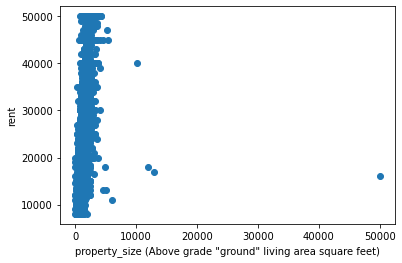

In [148]:
#Data Visulaisation
plt.scatter(x = train_data2['property_size'], y = train_data2['rent'])
plt.ylabel('rent')
plt.xlabel('property_size (Above grade "ground" living area square feet)')

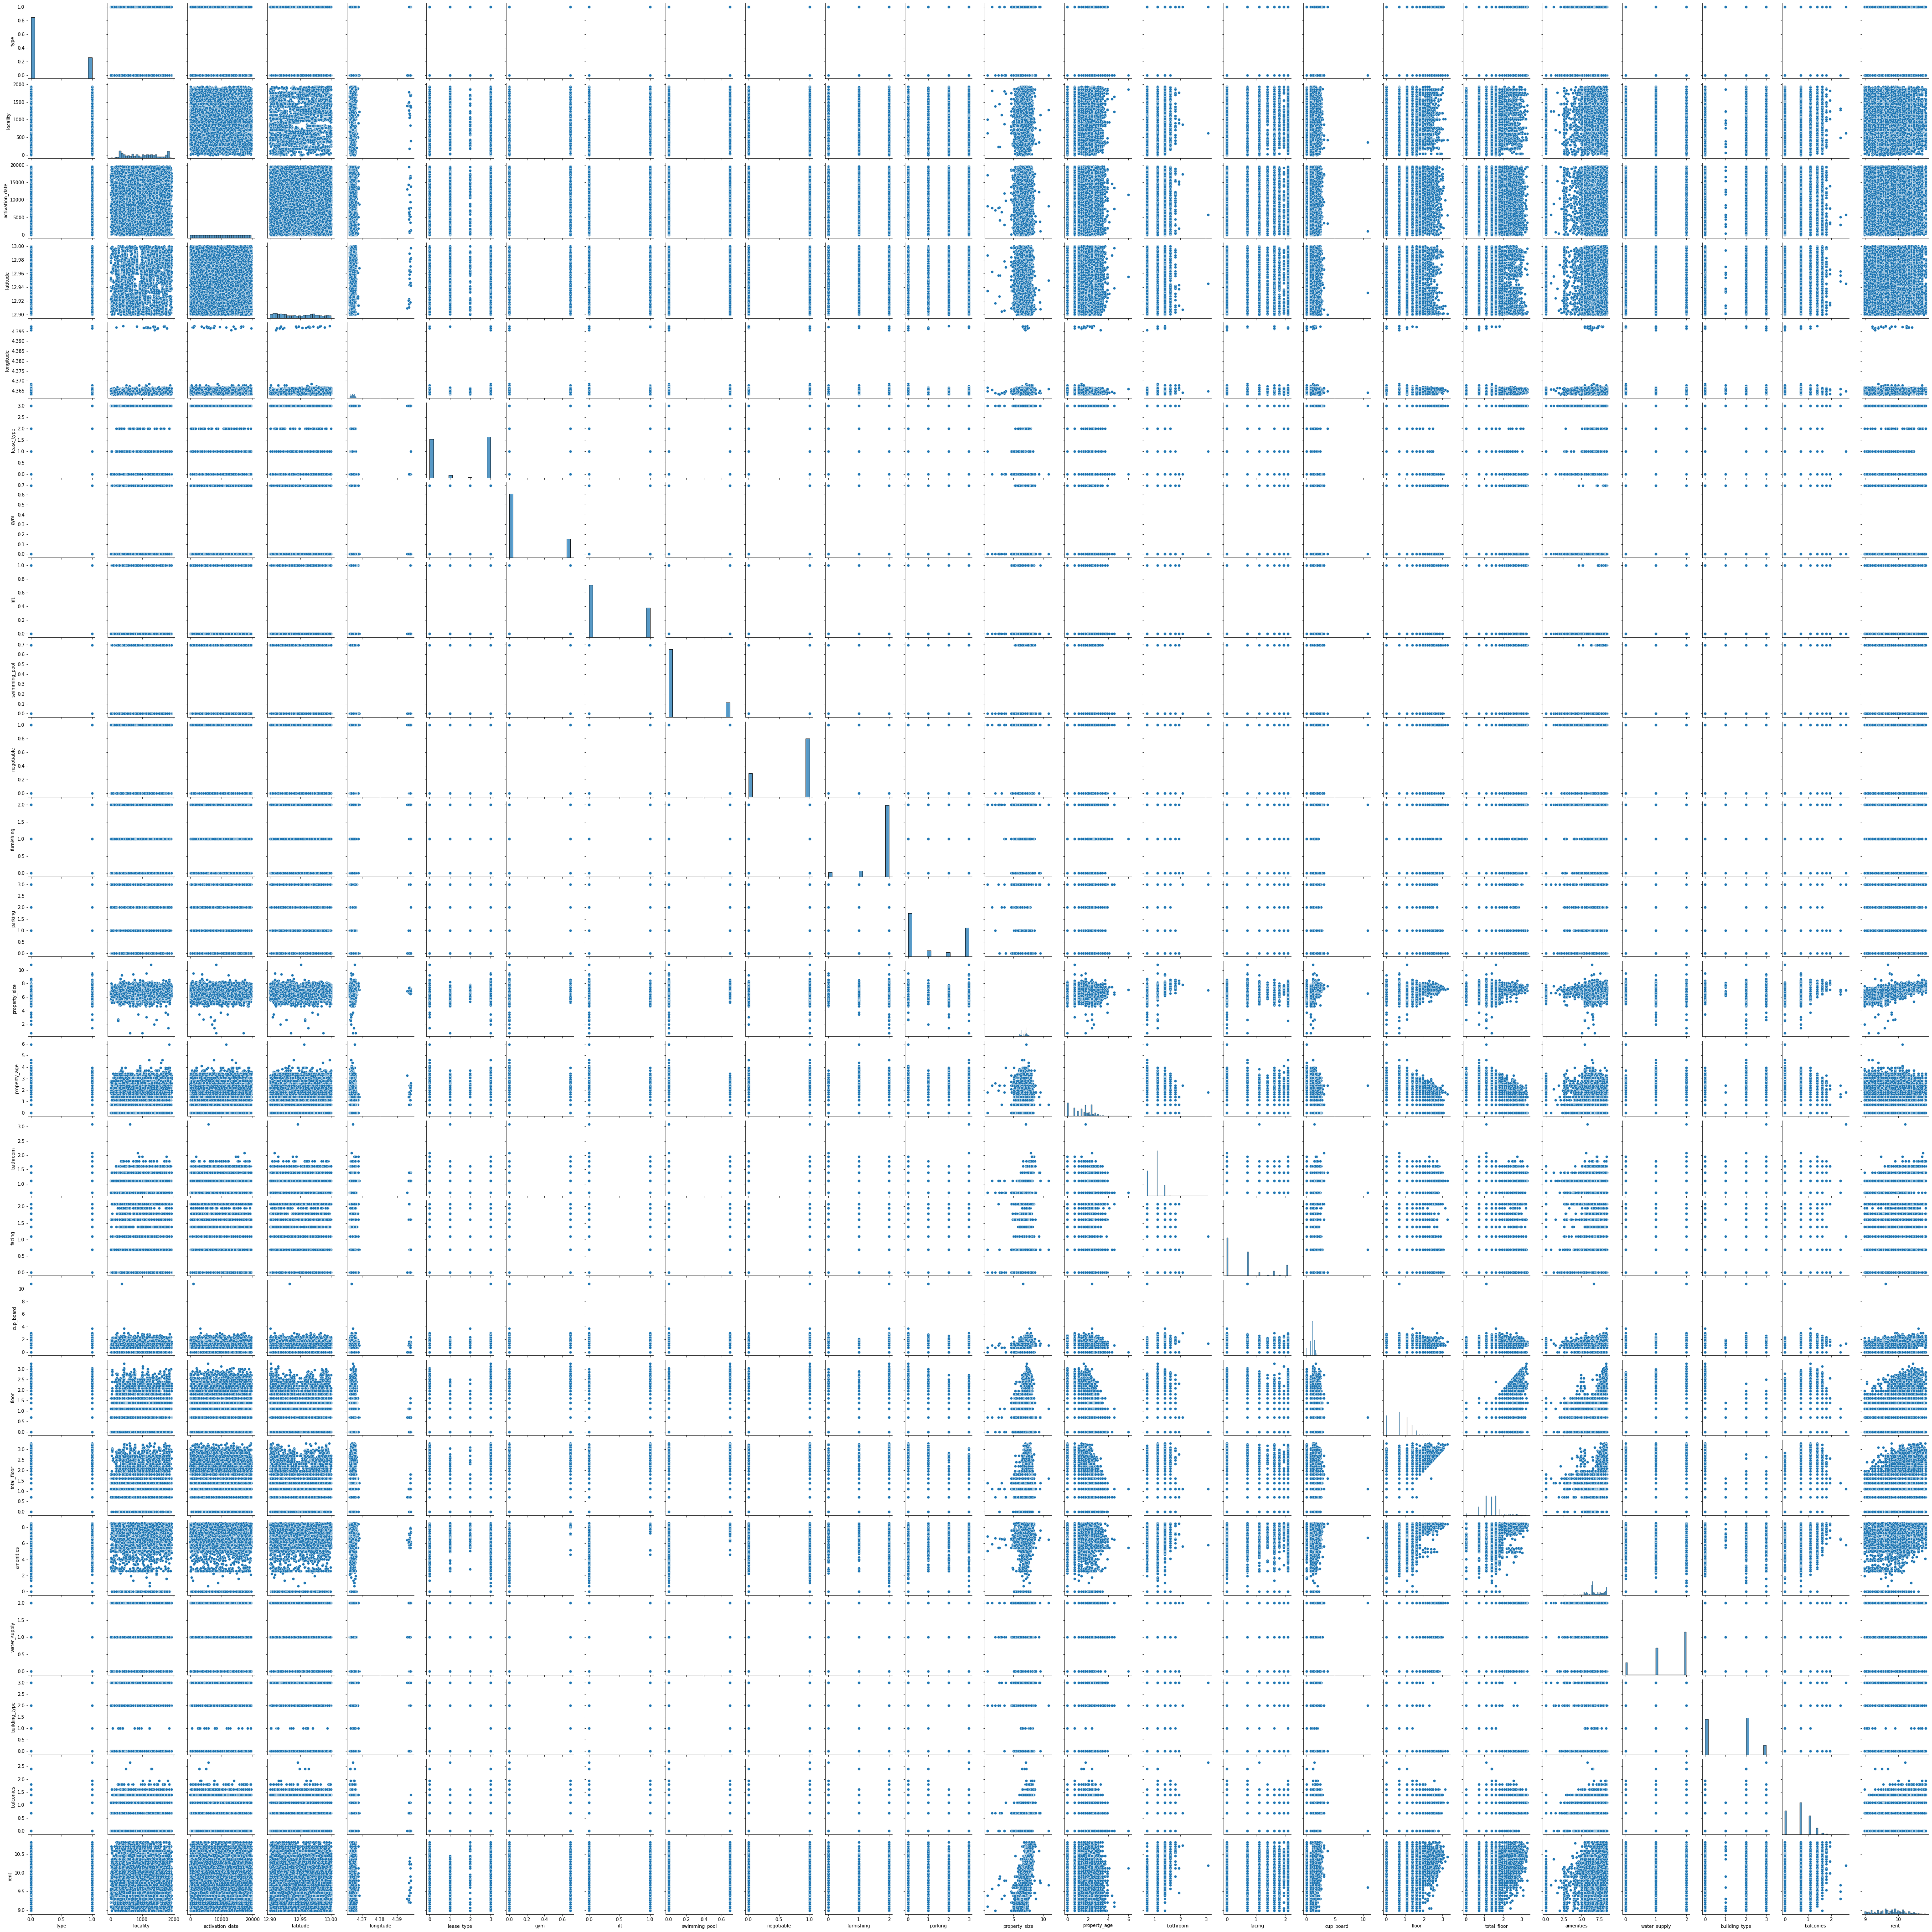

In [174]:
sns.pairplot(train_data2)

Text(0.5, 0, 'type')

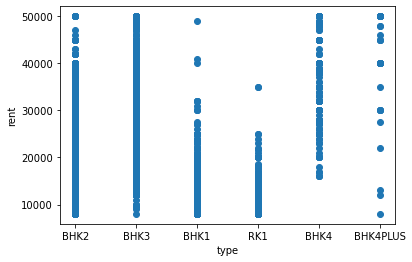

In [180]:
plt.scatter(x = train_data2['type'], y = train_data2['rent'])
plt.ylabel('rent')
plt.xlabel('type')

<AxesSubplot:xlabel='rent', ylabel='Density'>

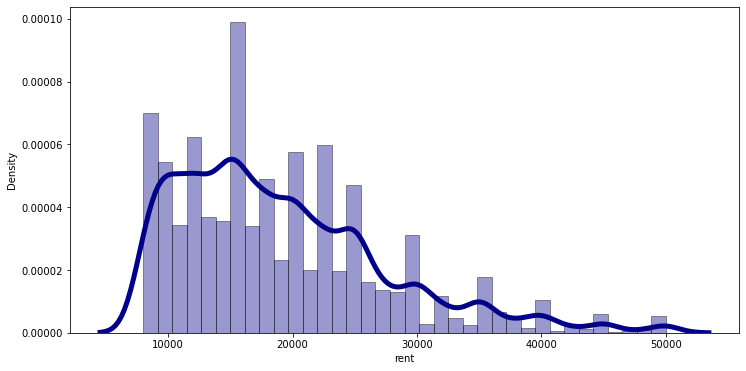

In [182]:
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(12,6))
sns.distplot(train_data2['rent'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

<AxesSubplot:>

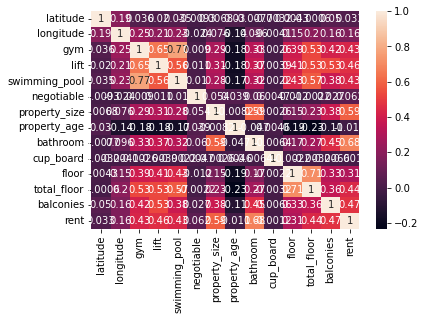

In [152]:
sns.heatmap(train_data2.corr(),annot=True)

In [183]:
train_percentage = train_data2.isnull().sum() / train_data2.shape[0]
print (train_percentage[train_percentage > 0.80])
train_data2= train_data2.drop(train_percentage[train_percentage > 0.80].index, axis = 1)

Series([], dtype: float64)


In [184]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [185]:
#Encoding Categorial Values to numeric Values
le = LabelEncoder()
for name in train_data2.columns:
    if train_data2[name].dtypes == 'O':
        train_data2[name] = train_data2[name].astype(str)
        le.fit(train_data2[name])
        train_data2[name] = le.transform(train_data2[name])

In [186]:
for column in train_data2.columns:
    null_vals = train_data2.isnull().values
    a, b = np.unique(train_data2.values[~null_vals], return_counts = 1)
    train_data2.loc[train_data2[column].isna(), column] = np.random.choice(a, train_data2[column].isnull().sum(), p = b / b.sum())

In [187]:
from scipy.stats import skew

In [188]:
skewed_train= train_data2.apply(lambda x: skew(x.dropna()))
skewed_train= skewed_train[skewed_train > .75]
train_data2[skewed_train.index] = np.log1p(train_data2[skewed_train.index])

In [189]:
train_data2.head()

type  locality  activation_date   latitude  longitude  lease_type  \
0  0.693147     466.0          13266.0  12.934471   4.364810         3.0   
1  0.693147     386.0           5891.0  12.929557   4.365291         0.0   
2  1.098612    1707.0           7733.0  12.982870   4.397679         3.0   
3  0.000000     236.0          12860.0  12.955991   4.363502         3.0   
4  1.098612    1076.0          19315.0  12.963903   4.365001         3.0   

        gym  lift  swimming_pool  negotiable  furnishing  parking  \
0  0.693147   1.0       0.693147         0.0         2.0      0.0   
1  0.000000   1.0       0.000000         1.0         2.0      0.0   
2  0.000000   1.0       0.000000         0.0         2.0      0.0   
3  0.000000   0.0       0.000000         1.0         2.0      3.0   
4  0.000000   0.0       0.000000         1.0         2.0      0.0   

   property_size  property_age  bathroom    facing  cup_board     floor  \
0       7.131699      3.258097  1.098612  0.000000   1.098612  1.945910   
1       7.244942      1.609438  1.098612  1.098612   1.098612  1.386294   
2       7.208600      1.945910  1.386294  0.000000   1.386294  0.693147   
3       6.398595      1.386294  0.693147  0.000000   0.693147  0.693147   
4       7.313887      2.772589  1.386294  0.000000   1.609438  0.000000   

   total_floor  amenities  water_supply  building_type  balconies       rent  
0     2.564949   8.424420           2.0            0.0   1.098612  10.596660  
1     1.609438   7.327123           1.0            0.0   1.098612   9.998843  
2     1.791759   7.389564           2.0            0.0   1.386294  10.239996  
3     1.098612   5.424950           1.0            3.0   0.000000   8.987322  
4     0.000000   6.122493           1.0            3.0   0.693147  10.714440

In [190]:
train_data2['lease_type'].unique()
train_data2['furnishing'].unique()

array([2., 0., 1.])

In [191]:
train_data2.isna()

type  locality  activation_date  latitude  longitude  lease_type  \
0      False     False            False     False      False       False   
1      False     False            False     False      False       False   
2      False     False            False     False      False       False   
3      False     False            False     False      False       False   
4      False     False            False     False      False       False   
...      ...       ...              ...       ...        ...         ...   
20495  False     False            False     False      False       False   
20496  False     False            False     False      False       False   
20497  False     False            False     False      False       False   
20498  False     False            False     False      False       False   
20499  False     False            False     False      False       False   

         gym   lift  swimming_pool  negotiable  furnishing  parking  \
0      False  False          False       False       False    False   
1      False  False          False       False       False    False   
2      False  False          False       False       False    False   
3      False  False          False       False       False    False   
4      False  False          False       False       False    False   
...      ...    ...            ...         ...         ...      ...   
20495  False  False          False       False       False    False   
20496  False  False          False       False       False    False   
20497  False  False          False       False       False    False   
20498  False  False          False       False       False    False   
20499  False  False          False       False       False    False   

       property_size  property_age  bathroom  facing  cup_board  floor  \
0              False         False     False   False      False  False   
1              False         False     False   False      False  False   
2              False         False     False   False      False  False   
3              False         False     False   False      False  False   
4              False         False     False   False      False  False   
...              ...           ...       ...     ...        ...    ...   
20495          False         False     False   False      False  False   
20496          False         False     False   False      False  False   
20497          False         False     False   False      False  False   
20498          False         False     False   False      False  False   
20499          False         False     False   False      False  False   

       total_floor  amenities  water_supply  building_type  balconies   rent  
0            False      False         False          False      False  False  
1            False      False         False          False      False  False  
2            False      False         False          False      False  False  
3            False      False         False          False      False  False  
4            False      False         False          False      False  False  
...            ...        ...           ...            ...        ...    ...  
20495        False      False         False          False      False  False  
20496        False      False         False          False      False  False  
20497        False      False         False          False      False  False  
20498        False      False         False          False      False  False  
20499        False      False         False          False      False  False  

[20500 rows x 24 columns]

In [192]:
train_data2.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [193]:
train_data2 = train_data2.astype({"type":'int'}) 
display(train_data2.dtypes)

type                 int32
locality           float64
activation_date    float64
latitude           float64
longitude          float64
lease_type         float64
gym                float64
lift               float64
swimming_pool      float64
negotiable         float64
furnishing         float64
parking            float64
property_size      float64
property_age       float64
bathroom           float64
facing             float64
cup_board          float64
floor              float64
total_floor        float64
amenities          float64
water_supply       float64
building_type      float64
balconies          float64
rent               float64
dtype: object

<AxesSubplot:xlabel='rent', ylabel='Density'>

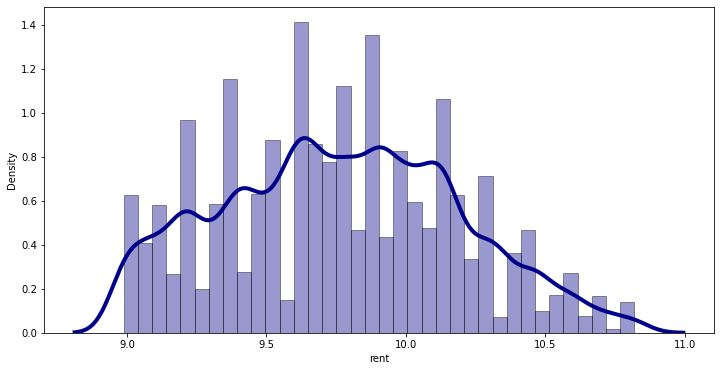

In [194]:
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
#
plt.figure(figsize=(12,6))
sns.distplot(train_data2['rent'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [195]:
#Model Training
from sklearn.model_selection import train_test_split


In [196]:
train_data2 = train_data2[np.isfinite(train_data2).all(1)]


In [197]:
X= train_data2.drop(['rent','amenities','locality','activation_date','latitude','longitude','property_age','facing','cup_board','floor','total_floor','building_type'], axis = 1)
y = train_data2['rent']


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [199]:
X_train.head()

type  lease_type       gym  lift  swimming_pool  negotiable  \
11662     0         3.0  0.000000   0.0            0.0         1.0   
121       1         3.0  0.000000   0.0            0.0         1.0   
2613      1         3.0  0.693147   1.0            0.0         1.0   
19647     0         0.0  0.693147   1.0            0.0         0.0   
12602     1         0.0  0.000000   0.0            0.0         0.0   

       furnishing  parking  property_size  bathroom  water_supply  balconies  
11662         2.0      3.0       6.685861  1.098612           1.0   0.693147  
121           2.0      2.0       7.601402  1.098612           2.0   1.098612  
2613          2.0      0.0       7.333676  1.098612           2.0   1.098612  
19647         0.0      0.0       6.846943  1.098612           0.0   0.693147  
12602         2.0      0.0       8.121480  1.386294           2.0   1.098612

In [200]:
X_test.head()

type  lease_type       gym  lift  swimming_pool  negotiable  \
15784     1         3.0  0.000000   1.0       0.000000         1.0   
14804     0         3.0  0.000000   1.0       0.000000         0.0   
1229      0         0.0  0.000000   0.0       0.000000         0.0   
5672      0         3.0  0.693147   1.0       0.693147         1.0   
6707      0         3.0  0.693147   1.0       0.693147         1.0   

       furnishing  parking  property_size  bathroom  water_supply  balconies  
15784         2.0      0.0       6.908755  1.098612           0.0   0.693147  
14804         0.0      0.0       6.981006  1.098612           2.0   1.098612  
1229          2.0      3.0       7.244942  0.693147           2.0   0.693147  
5672          2.0      0.0       7.048386  1.098612           2.0   0.693147  
6707          2.0      0.0       7.039660  1.098612           0.0   1.098612

In [201]:
X_test['lease_type'].unique()

array([3., 0., 1., 2.])

In [202]:
X_test.describe()

type   lease_type          gym         lift  swimming_pool  \
count  4094.000000  4094.000000  4094.000000  4094.000000    4094.000000   
mean      0.255007     1.534196     0.153901     0.361016       0.118516   
std       0.435919     1.479456     0.288116     0.480354       0.260997   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     3.000000     0.000000     0.000000       0.000000   
75%       1.000000     3.000000     0.000000     1.000000       0.000000   
max       1.000000     3.000000     0.693147     1.000000       0.693147   

        negotiable   furnishing      parking  property_size     bathroom  \
count  4094.000000  4094.000000  4094.000000    4094.000000  4094.000000   
mean      0.704934     1.812897     1.238398       6.858439     1.015785   
std       0.456128     0.519043     1.391690       0.475508     0.245217   
min       0.000000     0.000000     0.000000       1.945910     0.693147   
25%       0.000000     2.000000     0.000000       6.552508     0.693147   
50%       1.000000     2.000000     0.000000       6.933423     1.098612   
75%       1.000000     2.000000     3.000000       7.155006     1.098612   
max       1.000000     2.000000     3.000000       8.412055     2.079442   

       water_supply    balconies  
count   4094.000000  4094.000000  
mean       1.363214     0.649379  
std        0.737283     0.474079  
min        0.000000     0.000000  
25%        1.000000     0.000000  
50%        2.000000     0.693147  
75%        2.000000     1.098612  
max        2.000000     2.397895

In [203]:
y_train.head()

11662     9.472782
121      10.165890
2613      9.975855
19647    10.341775
12602    10.463132
Name: rent, dtype: float64

In [204]:
y_test.head()

15784    10.126671
14804    10.126671
1229      9.392745
5672      9.998843
6707      9.825580
Name: rent, dtype: float64

In [205]:
#Now fitting the Model using Multiple Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression  
lr = linear_model.LinearRegression()

In [206]:
#np.all(np.isfinite(train_data2))

In [207]:
#train_data2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [208]:
model = lr.fit(X_train, y_train)

In [209]:
# make predictions based on model
predictions = model.predict(X_test)

In [210]:
model.score(X_test, y_test)

0.6710633340738186

In [211]:
#pick a sampel to manually test it
X_test[:1]


type  lease_type  gym  lift  swimming_pool  negotiable  furnishing  \
15784     1         3.0  0.0   1.0            0.0         1.0         2.0   

       parking  property_size  bathroom  water_supply  balconies  
15784      0.0       6.908755  1.098612           0.0   0.693147

In [212]:
model.predict(X_test[:1])

array([9.93924406])

In [213]:
y_test[:1]

15784    10.126671
Name: rent, dtype: float64

In [214]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import math
y_actual = y_test[:1]
y_predicted = model.predict(X_test[:1])
 
MSE = mean_squared_error(y_actual, y_predicted)

 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.18742704361140206


In [215]:
import pickle
pickle.dump(model, open('MachineKnightModel.pkl', 'wb'))